In [1]:
import os

cwd = os.getcwd()
os.chdir('../Executables/py_BB/xtrack/tests')

import pathlib
import numpy as np

import xtrack as xt
import xpart as xp
import xobjects as xo
import xfields as xf

from cpymad.madx import Madx

seq_name = 'lhcb1'
__file__ = '/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/tests/test_vs_madx.py' # REMOVE
test_data_folder = pathlib.Path(
        __file__).parent.joinpath('../test_data').absolute()

path = test_data_folder.joinpath('hllhc14_input_mad/')


mad_no_errors = Madx(command_log="mad_final.log")
mad_no_errors.call(str(test_data_folder.joinpath(
                               'hllhc15_noerrors_nobb/sequence.madx')))
mad_no_errors.use(sequence=seq_name)
mad_no_errors.globals['vrf400'] = 16
mad_no_errors.globals['lagrf400.b1'] = 0.5
mad_no_errors.twiss()


# start test_survey here:

mad = mad_no_errors
mad.survey()

srvmad = mad.table.survey.dframe()

line_full = xt.Line.from_madx_sequence(mad.sequence['lhcb1'])
line_full.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1,
                        gamma0=mad.sequence.lhcb1.beam.gamma)

tracker = xt.Tracker(line=line_full)

os.chdir(cwd)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2022.10.05 13:38:52      +
  ++++++++++++++++++++++++++++++++++++++++++++
beam,particle="proton",sequence="lhcb1",bunched=true,radiate=false,mass:=0.93827208816,charge:=1,energy:=7000,pc:=6999.99993711753,gamma:=7460.52247352616,beta:=0.999999991016791,brho:=23349.4864541173,ex:=3.35097174342857e-10

,exn:=2.49999997754198e-06,ey:=3.35097174342857e-10,eyn:=2.49999997754198e-06,et:=0.001,sigt:=0,sige:=0.00011409582438835,kbunch:=1,npart:=220000000000,bcurrent:=0.000396380077084494,freq0:=0.0112454994103767,circ:=26658.8832,dtbyds:=0

,deltap:=0,alfa:=1.79664186004107e-08,u0:=0,qs:=0,arad:=1.53469826634454e-18,bv:=1,pdamp:={1 ,1 ,2 },n1min:=-1;

++++++ warning: Both energy and pc specified; pc was ignored.
++++++ warning: Both energy and gamma specified; gamma was ignored.
++++++ wa

In [5]:
xsurvey   = tracker.survey()
srvXsuite = xsurvey.to_pandas(index='name')

display(srvmad)
display(srvXsuite)

,name,keyword,s,l,angle,x,y,z,theta,phi,psi,globaltilt,tilt,slot_id,assembly_id,mech_sep,v_pos,comments
#s,lhcb1$start:1,marker,0.0000,0.0000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
ip3,ip3:1,marker,0.0000,0.0000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
drift_0[0],drift_0:0,drift,21.0300,21.0300,0.0,0.00000,0.0,21.030000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
mcbwv.4r3.b1,mcbwv.4r3.b1:1,vkicker,21.0300,0.0000,0.0,0.00000,0.0,21.030000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
drift_1[0],drift_1:0,drift,22.5205,1.4905,0.0,0.00000,0.0,22.520500,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1,bpmw.4l3.b1:1,monitor,26636.4387,0.0000,0.0,-0.00008,0.0,-22.444629,-6.283185,0.0,0.0,0.0,0.0,297862.0,0.0,-0.224,0.0,
drift_11712[0],drift_11712:0,drift,26640.1832,3.7445,0.0,-0.00008,0.0,-18.700129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
mcbwh.4l3.b1,mcbwh.4l3.b1:1,hkicker,26640.1832,0.0000,0.0,-0.00008,0.0,-18.700129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
drift_11713[0],drift_11713:0,drift,26658.8832,18.7000,0.0,-0.00008,0.0,-0.000129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,


,s,l,X,Y,Z,theta,phi,psi
name,,,,,,,,
lhcb1$start,0.0000,0.0000,0.00000,0.0,0.000000,0.000000e+00,0.0,0.0
ip3,0.0000,0.0000,0.00000,0.0,0.000000,0.000000e+00,0.0,0.0
drift_0,0.0000,21.0300,0.00000,0.0,21.030000,0.000000e+00,0.0,0.0
mcbwv.4r3.b1,21.0300,0.0000,0.00000,0.0,21.030000,0.000000e+00,0.0,0.0
drift_1,21.0300,1.4905,0.00000,0.0,22.520500,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...
drift_11712,26636.4387,3.7445,-0.00008,0.0,-18.700129,5.881018e-15,0.0,0.0
mcbwh.4l3.b1,26640.1832,0.0000,-0.00008,0.0,-18.700129,5.881018e-15,0.0,0.0
drift_11713,26640.1832,18.7000,-0.00008,0.0,-0.000129,5.881018e-15,0.0,0.0


In [10]:
srvmad

,name,keyword,s,l,angle,x,y,z,theta,phi,psi,globaltilt,tilt,slot_id,assembly_id,mech_sep,v_pos,comments
#s,lhcb1$start:1,marker,0.0000,0.0000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
ip3,ip3:1,marker,0.0000,0.0000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
drift_0[0],drift_0:0,drift,21.0300,21.0300,0.0,0.00000,0.0,21.030000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
mcbwv.4r3.b1,mcbwv.4r3.b1:1,vkicker,21.0300,0.0000,0.0,0.00000,0.0,21.030000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
drift_1[0],drift_1:0,drift,22.5205,1.4905,0.0,0.00000,0.0,22.520500,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bpmw.4l3.b1,bpmw.4l3.b1:1,monitor,26636.4387,0.0000,0.0,-0.00008,0.0,-22.444629,-6.283185,0.0,0.0,0.0,0.0,297862.0,0.0,-0.224,0.0,
drift_11712[0],drift_11712:0,drift,26640.1832,3.7445,0.0,-0.00008,0.0,-18.700129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
mcbwh.4l3.b1,mcbwh.4l3.b1:1,hkicker,26640.1832,0.0000,0.0,-0.00008,0.0,-18.700129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
drift_11713[0],drift_11713:0,drift,26658.8832,18.7000,0.0,-0.00008,0.0,-0.000129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,


In [18]:
srvmad.loc[idx,'x']

ip3                0.00000
mcbwv.4r3.b1       0.00000
bpmw.4r3.b1        0.00000
mqwa.a4r3.b1..1    0.00000
mqwa.a4r3.b1..2    0.00000
                    ...   
mqwa.a4l3.b1      -0.00008
mqwa.a4l3.b1..3   -0.00008
mqwa.a4l3.b1..4   -0.00008
bpmw.4l3.b1       -0.00008
mcbwh.4l3.b1      -0.00008
Name: x, Length: 11763, dtype: float64

In [15]:
srvmad.loc[idx]

,name,keyword,s,l,angle,x,y,z,theta,phi,psi,globaltilt,tilt,slot_id,assembly_id,mech_sep,v_pos,comments
ip3,ip3:1,marker,0.0000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,
mcbwv.4r3.b1,mcbwv.4r3.b1:1,vkicker,21.0300,0.0,0.0,0.00000,0.0,21.030000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
bpmw.4r3.b1,bpmw.4r3.b1:1,monitor,22.5205,0.0,0.0,0.00000,0.0,22.520500,0.000000,0.0,0.0,0.0,0.0,134740.0,0.0,-0.224,0.0,
mqwa.a4r3.b1..1,mqwa.a4r3.b1..1:1,multipole,23.3918,0.0,0.0,0.00000,0.0,23.391800,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
mqwa.a4r3.b1..2,mqwa.a4r3.b1..2:1,multipole,24.2206,0.0,0.0,0.00000,0.0,24.220600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mqwa.a4l3.b1,mqwa.a4l3.b1:1,marker,26634.2482,0.0,0.0,-0.00008,0.0,-24.635129,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
mqwa.a4l3.b1..3,mqwa.a4l3.b1..3:1,multipole,26634.6626,0.0,0.0,-0.00008,0.0,-24.220729,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
mqwa.a4l3.b1..4,mqwa.a4l3.b1..4:1,multipole,26635.4914,0.0,0.0,-0.00008,0.0,-23.391929,-6.283185,0.0,0.0,0.0,0.0,0.0,0.0,-0.224,0.0,
bpmw.4l3.b1,bpmw.4l3.b1:1,monitor,26636.4387,0.0,0.0,-0.00008,0.0,-22.444629,-6.283185,0.0,0.0,0.0,0.0,297862.0,0.0,-0.224,0.0,


In [21]:
xsurvey = tracker.survey().to_pandas(index='name')

for ridof in ['drift','#']:
    srvmad    =    srvmad[np.invert(srvmad.index.str.contains(ridof,regex=False))]

for coord in ['X','Z']:
    idx = srvmad[coord.lower()].index
    assert np.all(np.isclose(xsurvey.loc[idx,coord],srvmad.loc[idx,coord.lower()], atol=1e-9, rtol=0))


In [6]:
%%timeit
tracker.survey()

394 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:

import pandas as pd

def get_w_from_angles(theta,phi,psi):
    '''W matrix, see MAD-X manual'''
    costhe = np.cos(theta)
    cosphi = np.cos(phi)
    cospsi = np.cos(psi)
    sinthe = np.sin(theta)
    sinphi = np.sin(phi)
    sinpsi = np.sin(psi)
    w       = np.zeros([3,3])
    w[0, 0] = + costhe * cospsi - sinthe * sinphi * sinpsi
    w[0, 1] = - costhe * sinpsi - sinthe * sinphi * cospsi
    w[0, 2] = sinthe * cosphi
    w[1, 0] = cosphi * sinpsi
    w[1, 1] = cosphi * cospsi
    w[1, 2] = sinphi
    w[2, 0] = - sinthe * cospsi - costhe * sinphi * sinpsi
    w[2, 1] = + sinthe * sinpsi - costhe * sinphi * cospsi
    w[2, 2] = costhe * cosphi
    return w


def get_angles_from_w(w):
    # w[0, 2]/w[2, 2] = (sinthe * cosphi)/(costhe * cosphi)
    # w[1, 0]/w[1, 1] = (cosphi * sinpsi)/(cosphi * cospsi)
    # w[1, 2]/w[1, 1] = (sinphi)/(cosphi * cospsi)

    theta = np.arctan2(w[0, 2], w[2, 2])
    psi   = np.arctan2(w[1, 0], w[1, 1])    
    phi   = np.arctan2(w[1, 2],w[1, 1]/np.cos(psi))

    return theta,phi,psi



def advance_bend(v,w,R,S):
    '''Advancing through elements, see MAD-X manual:
        v2 = w1*R + v1  | w2 = w1*S'''
    return np.dot(w,R)+v,np.dot(w,S)


def advance_drift(v,w,R):
    '''Advancing through elements, see MAD-X manual:
        v2 = w1*R + v1  | w2 = w1*S -> S is unity'''
    return np.dot(w,R)+v,w


def element_advance(v,w,length=0,angle=0,tilt=0):
    '''Computing the advance element-by-element. See MAD-X manual for generation of R and S'''
    if angle  == 0:
        R = np.array([0,0,length])
        return advance_drift(v,w,R)
    elif tilt == 0:
        # Relevant sine/cosine
        ca=np.cos(angle); sa=np.sin(angle)
        #------
        rho = length/angle
        R   = np.array([rho*(ca-1),0,rho*sa])
        S   = np.array([[ca , 0 ,-sa],
                        [0  , 1 ,  0],
                        [sa , 0 , ca]])
        return advance_bend(v,w,R,S)

    else:
        # Relevant sine/cosine
        ca=np.cos(angle); sa=np.sin(angle)
        ct=np.cos(tilt); st=np.sin(tilt)
        #------
        rho = length/angle
        R   = np.array([rho*(ca-1),0,rho*sa])
        S   = np.array([[ca , 0 ,-sa],
                        [0  , 1 ,  0],
                        [sa , 0 , ca]])

        # Orthogonal rotation matrix for tilt
        T   = np.array([[ct ,-st,  0],
                        [st , ct,  0],
                        [0  , 0 ,  1]])
        Tinv= np.array([[ct , st,  0],
                        [-st, ct,  0],
                        [0  , 0 ,  1]])

        return advance_bend(v,w,np.dot(T,R),np.dot(T,np.dot(S,Tinv)))
        



_is_thick = xt.line._is_thick #tmp

# TO ADD in xtrack.line
#========================================
def get_length_elements(self):
        lengths = []
        for ee in self.elements:
            if _is_thick(ee):
                lengths.append(ee.length)
            else:
                lengths.append(0.0)
        return lengths
#========================================


import types  # TMP                  
tracker.line.get_length_elements = types.MethodType(get_length_elements, tracker.line) # TMP


class SurveyTable(dict):
    def __init__(self, *args, **kwargs):
        dict.__init__(self, *args, **kwargs)
        self.__dict__ = self

    def to_pandas(self,index = None):
        import pandas as pd
        df = pd.DataFrame(self)
        if index is not None:
            df.set_index(index,inplace=True)
        return df


# SURVEY FROM TRACKER
#========================================

X0=0;Y0=0;Z0=0;theta0=0;phi0=0;psi0=0

survey_el_by_el = SurveyTable({ 'name'  : tracker.line.element_names + ('_end_point',),
                                's'     : np.array(tracker.line.get_s_elements() + [tracker.line.get_length()]),
                                'l'     : np.array(tracker.line.get_length_elements() + [0.0]),
                                'X'     : [X0],
                                'Y'     : [Y0],
                                'Z'     : [Z0],
                                'theta' : [theta0],
                                'phi'   : [phi0],
                                'psi'   : [psi0] })


v = np.array([X0,Y0,Z0])
w = get_w_from_angles(theta = theta0, phi = phi0, psi = psi0)
for ee,length,name in zip(tracker.line.elements[1:],survey_el_by_el['l'][1:-1],survey_el_by_el['name'][1:-1]):
    
    hxl,hyl = (ee.hxl,ee.hyl) if hasattr(ee ,'hxl') else (0,0)
    
    ##############
    # TODO Generalize for non-flat machines
    assert hyl == 0, f"Survey of machines with tilt not yet implemented, {name} has hyl={hyl} "
    
    angle = hxl
    tilt  = 0
    ##############

    # Advancing
    v,w = element_advance(v,w,length=length,angle=angle,tilt=tilt)

    # Unpacking results
    theta,phi,psi = get_angles_from_w(w)
    #----
    survey_el_by_el['X'].append(v[0])
    survey_el_by_el['Y'].append(v[1])
    survey_el_by_el['Z'].append(v[2])
    #----
    survey_el_by_el['theta'].append(theta)
    survey_el_by_el['phi'].append(phi)
    survey_el_by_el['psi'].append(psi)

# Repeating for endpoint
for _key in ['X','Y','Z','theta','phi','psi']:
    survey_el_by_el[_key].append(survey_el_by_el[_key][-1])



srvXsuite = survey_el_by_el.to_pandas(index='name')


In [5]:
srvXsuite

,s,l,X,Y,Z,theta,phi,psi
name,,,,,,,,
lhcb1$start,0.0000,0.0000,0.00000,0.0,0.000000,0.000000e+00,0.0,0.0
ip3,0.0000,0.0000,0.00000,0.0,0.000000,0.000000e+00,0.0,0.0
drift_0,0.0000,21.0300,0.00000,0.0,21.030000,0.000000e+00,0.0,0.0
mcbwv.4r3.b1,21.0300,0.0000,0.00000,0.0,21.030000,0.000000e+00,0.0,0.0
drift_1,21.0300,1.4905,0.00000,0.0,22.520500,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...
drift_11712,26636.4387,3.7445,-0.00008,0.0,-18.700129,5.881018e-15,0.0,0.0
mcbwh.4l3.b1,26640.1832,0.0000,-0.00008,0.0,-18.700129,5.881018e-15,0.0,0.0
drift_11713,26640.1832,18.7000,-0.00008,0.0,-0.000129,5.881018e-15,0.0,0.0


Text(0, 0.5, 'z (m)')

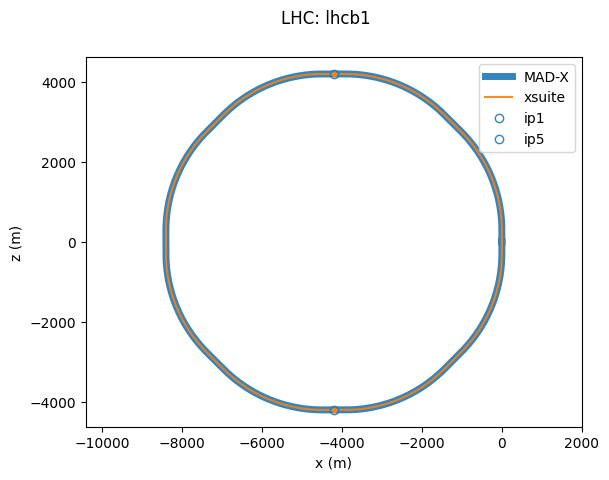

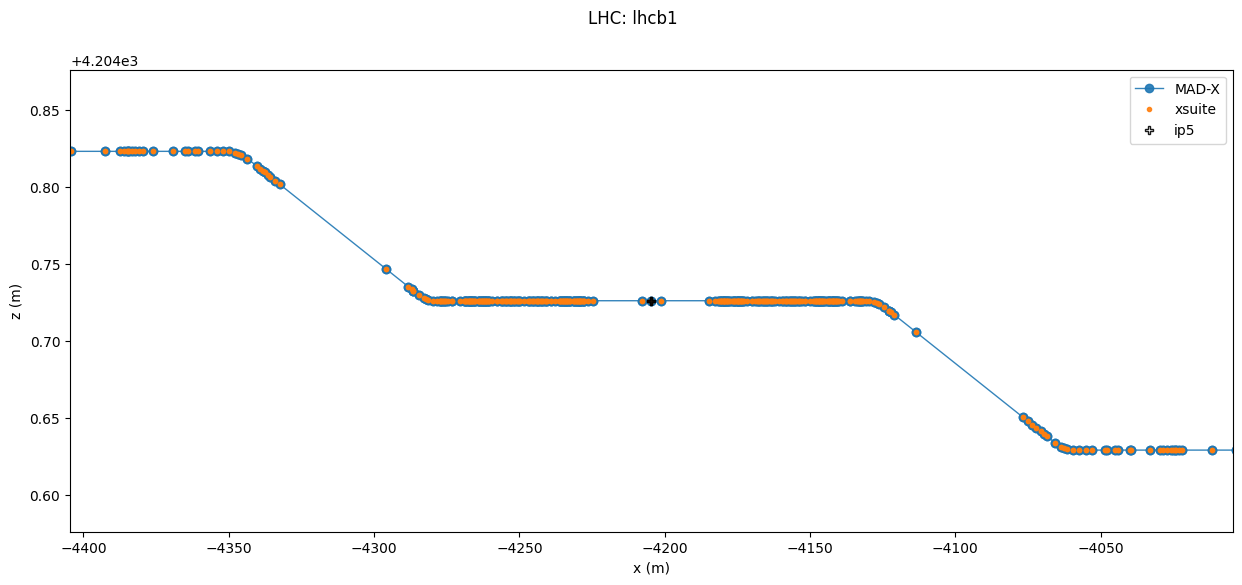

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.suptitle(f'LHC: {seq_name}')
plt.plot(srvmad['x']   ,srvmad['z']   ,'-',color='C0',alpha=0.9,label='MAD-X' ,lw=5)
plt.plot(srvXsuite['X'],srvXsuite['Z'],'-',color='C1',alpha=0.9,label='xsuite')
for _IP in ['ip1','ip5']:
    plt.plot(srvmad.loc[_IP,'x']   ,srvmad.loc[_IP,'z']   ,'o',color='C0',alpha=0.9,label=_IP,mfc='none')
    plt.plot(srvXsuite.loc[_IP,'X'],srvXsuite.loc[_IP,'Z'],'.',color='C1',alpha=0.9)
plt.legend()
plt.axis('equal')
plt.xlabel('x (m)')
plt.ylabel(r'z (m)')


plt.figure(figsize=(15,6))
plt.suptitle(f'LHC: {seq_name}')
plt.plot(srvmad['x']   ,srvmad['z']   ,'-o',color='C0',alpha=0.9,label='MAD-X' ,lw=1)
plt.plot(srvXsuite['X'],srvXsuite['Z'],'.',color='C1',alpha=0.9,label='xsuite')
for _IP in ['ip5']:
    plt.plot(srvmad.loc[_IP,'x']   ,srvmad.loc[_IP,'z']   ,'P',color='k',alpha=0.9,label=_IP,mfc='none')
    plt.plot(srvXsuite.loc[_IP,'X'],srvXsuite.loc[_IP,'Z'],'P',color='k',alpha=0.9)
plt.legend()
#plt.axis('square')
_IP = 'ip5'
plt.xlim([srvmad.loc[_IP,'x']-200,srvmad.loc[_IP,'x']+200])
plt.ylim([srvmad.loc[_IP,'z']-150e-3,srvmad.loc[_IP,'z']+150e-3])
plt.xlabel('x (m)')
plt.ylabel(r'z (m)')




In [17]:
diffX = srvmad['x']-srvXsuite['X']
diffX.dropna()

acfga.4al1.b1      -1.364242e-11
acfga.4al5.b1       4.092726e-12
acfga.4ar1.b1      -1.364242e-11
acfga.4ar5.b1       3.637979e-12
acfga.4bl1.b1      -1.364242e-11
                        ...     
vtctpxv.4r1.b.b1   -1.364242e-11
vtctpxv.4r5.a.b1    3.637979e-12
vtctpxv.4r5.b.b1    3.637979e-12
x2zdc.4l2          -2.069100e-11
x2zdc.4r2          -2.091838e-11
Length: 11763, dtype: float64

Text(0, 0.5, 'diff')

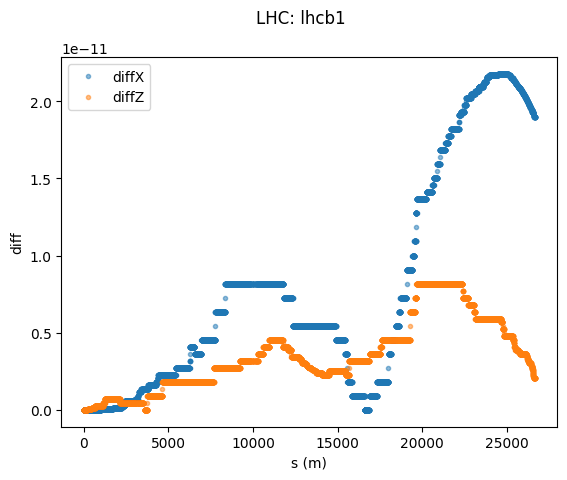

In [30]:


diffX = (srvmad['x']-srvXsuite['X']).dropna()
diffZ = (srvmad['z']-srvXsuite['Z']).dropna()

plt.figure()
plt.suptitle(f'LHC: {seq_name}')
plt.plot(srvXsuite.loc[diffX.index,'s'],np.abs(diffX),'.',alpha=0.5,label='diffX')
plt.plot(srvXsuite.loc[diffZ.index,'s'],np.abs(diffZ),'.',alpha=0.5,label='diffZ')

plt.legend()
plt.xlabel('s (m)')
plt.ylabel(r'diff')

Text(0, 0.5, 'Rel. diff')

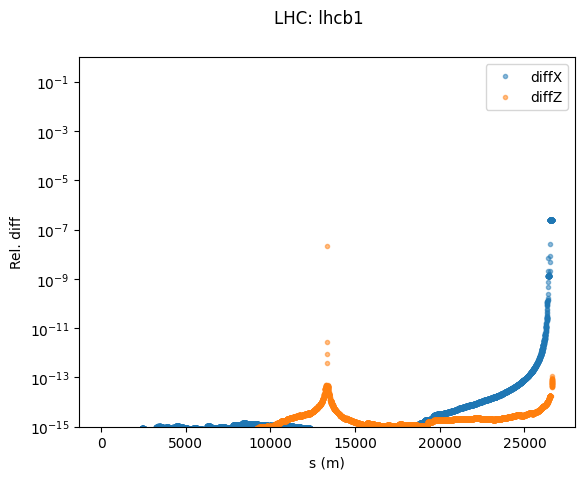

In [29]:


diffX = (srvmad['x']-srvXsuite['X']).dropna()
diffZ = (srvmad['z']-srvXsuite['Z']).dropna()

plt.figure()
plt.suptitle(f'LHC: {seq_name}')
plt.plot(srvXsuite.loc[diffX.index,'s'],np.abs(diffX/srvmad.loc[diffX.index,'x']),'.',alpha=0.5,label='diffX')
plt.plot(srvXsuite.loc[diffZ.index,'s'],np.abs(diffZ/srvmad.loc[diffZ.index,'z']),'.',alpha=0.5,label='diffZ')

plt.legend()
plt.ylim([1e-15,1])
plt.yscale('log')
plt.xlabel('s (m)')
plt.ylabel(r'Rel. diff')

In [20]:
(srvmad['x']-srvXsuite['X']).loc['ip3']

0.0

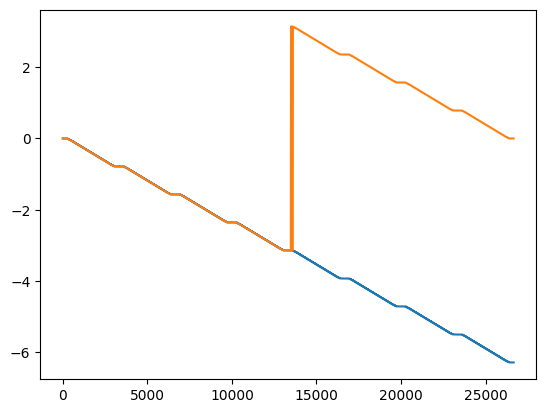

In [8]:
plt.figure()
plt.plot(srvmad.s,srvmad.theta)
plt.plot(srvXsuite.s,srvXsuite.theta)